In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sns
sns.set()
rcParams['figure.figsize'] = 40,10

In [2]:
BP = pd.read_csv('BP_copy.csv')

In [3]:
BP.head()

,測定日,タイムゾーン,最高血圧(mmHg),最低血圧(mmHg),脈拍(bpm),不規則脈波検出,体動検出,ぴったり巻き,測定姿勢ガイド,室温(℃),機種
0,2017/05/04 11:25,Asia/Tokyo,109,72,65,未検出,未検出,OK,NaN,NaN,HEM-7600T
1,2017/05/04 11:26,Asia/Tokyo,105,66,71,未検出,未検出,OK,NaN,NaN,HEM-7600T
2,2017/05/04 17:28,Asia/Tokyo,125,72,78,未検出,未検出,OK,NaN,NaN,HEM-7600T
3,2017/05/04 17:30,Asia/Tokyo,124,69,74,未検出,未検出,OK,NaN,NaN,HEM-7600T
4,2017/05/04 20:16,Asia/Tokyo,127,69,68,未検出,未検出,OK,NaN,NaN,HEM-7600T


In [4]:
sum(BP["最高血圧(mmHg)"].isnull())

0

In [5]:
BP.rename(columns = {'測定日':'Date', 'タイムゾーン':'TimeZone', '最高血圧(mmHg)':'SYS','最低血圧(mmHg)':'DIA', '脈拍(bpm)':'BPM',
                     '不規則脈波検出':'AF','体動検出':'BodyNoise','ぴったり巻き':'Cuff','測定姿勢ガイド':'Posture','室温(℃)':'Temp',
                    '機種':'Device'}, inplace = True)
BP

,Date,TimeZone,SYS,DIA,BPM,AF,BodyNoise,Cuff,Posture,Temp,Device
0,2017/05/04 11:25,Asia/Tokyo,109,72,65,未検出,未検出,OK,NaN,NaN,HEM-7600T
1,2017/05/04 11:26,Asia/Tokyo,105,66,71,未検出,未検出,OK,NaN,NaN,HEM-7600T
2,2017/05/04 17:28,Asia/Tokyo,125,72,78,未検出,未検出,OK,NaN,NaN,HEM-7600T
3,2017/05/04 17:30,Asia/Tokyo,124,69,74,未検出,未検出,OK,NaN,NaN,HEM-7600T
4,2017/05/04 20:16,Asia/Tokyo,127,69,68,未検出,未検出,OK,NaN,NaN,HEM-7600T
5,2017/05/04 23:55,Asia/Tokyo,128,82,61,未検出,未検出,OK,NaN,NaN,HEM-7600T
6,2017/05/05 04:02,Asia/Tokyo,125,70,87,未検出,未検出,OK,NaN,NaN,HEM-7600T
7,2017/05/05 10:14,Asia/Tokyo,114,61,85,未検出,未検出,OK,NaN,NaN,HEM-7600T
8,2017/05/05 10:15,Asia/Tokyo,110,54,86,未検出,未検出,OK,NaN,NaN,HEM-7600T
9,2017/05/05 22:35,Asia/Tokyo,127,64,79,未検出,未検出,OK,NaN,NaN,HEM-7600T


In [6]:
BP.loc[BP['AF'] == '未検出', 'AF'] = 0
BP.loc[BP['AF'] == '検出', 'AF'] = 1

BP.loc[BP['BodyNoise'] == '未検出', 'BodyNoise'] = 0
BP.loc[BP['BodyNoise'] == '検出', 'BodyNoise'] = 1

BP.loc[BP['Posture'] == '正しい', 'Posture'] = 1



In [7]:
BP.head(50)

,Date,TimeZone,SYS,DIA,BPM,AF,BodyNoise,Cuff,Posture,Temp,Device
0,2017/05/04 11:25,Asia/Tokyo,109,72,65,0,0,OK,NaN,NaN,HEM-7600T
1,2017/05/04 11:26,Asia/Tokyo,105,66,71,0,0,OK,NaN,NaN,HEM-7600T
2,2017/05/04 17:28,Asia/Tokyo,125,72,78,0,0,OK,NaN,NaN,HEM-7600T
3,2017/05/04 17:30,Asia/Tokyo,124,69,74,0,0,OK,NaN,NaN,HEM-7600T
4,2017/05/04 20:16,Asia/Tokyo,127,69,68,0,0,OK,NaN,NaN,HEM-7600T
5,2017/05/04 23:55,Asia/Tokyo,128,82,61,0,0,OK,NaN,NaN,HEM-7600T
6,2017/05/05 04:02,Asia/Tokyo,125,70,87,0,0,OK,NaN,NaN,HEM-7600T
7,2017/05/05 10:14,Asia/Tokyo,114,61,85,0,0,OK,NaN,NaN,HEM-7600T
8,2017/05/05 10:15,Asia/Tokyo,110,54,86,0,0,OK,NaN,NaN,HEM-7600T
9,2017/05/05 22:35,Asia/Tokyo,127,64,79,0,0,OK,NaN,NaN,HEM-7600T


In [25]:
BP.to_csv('Transcribed.csv')

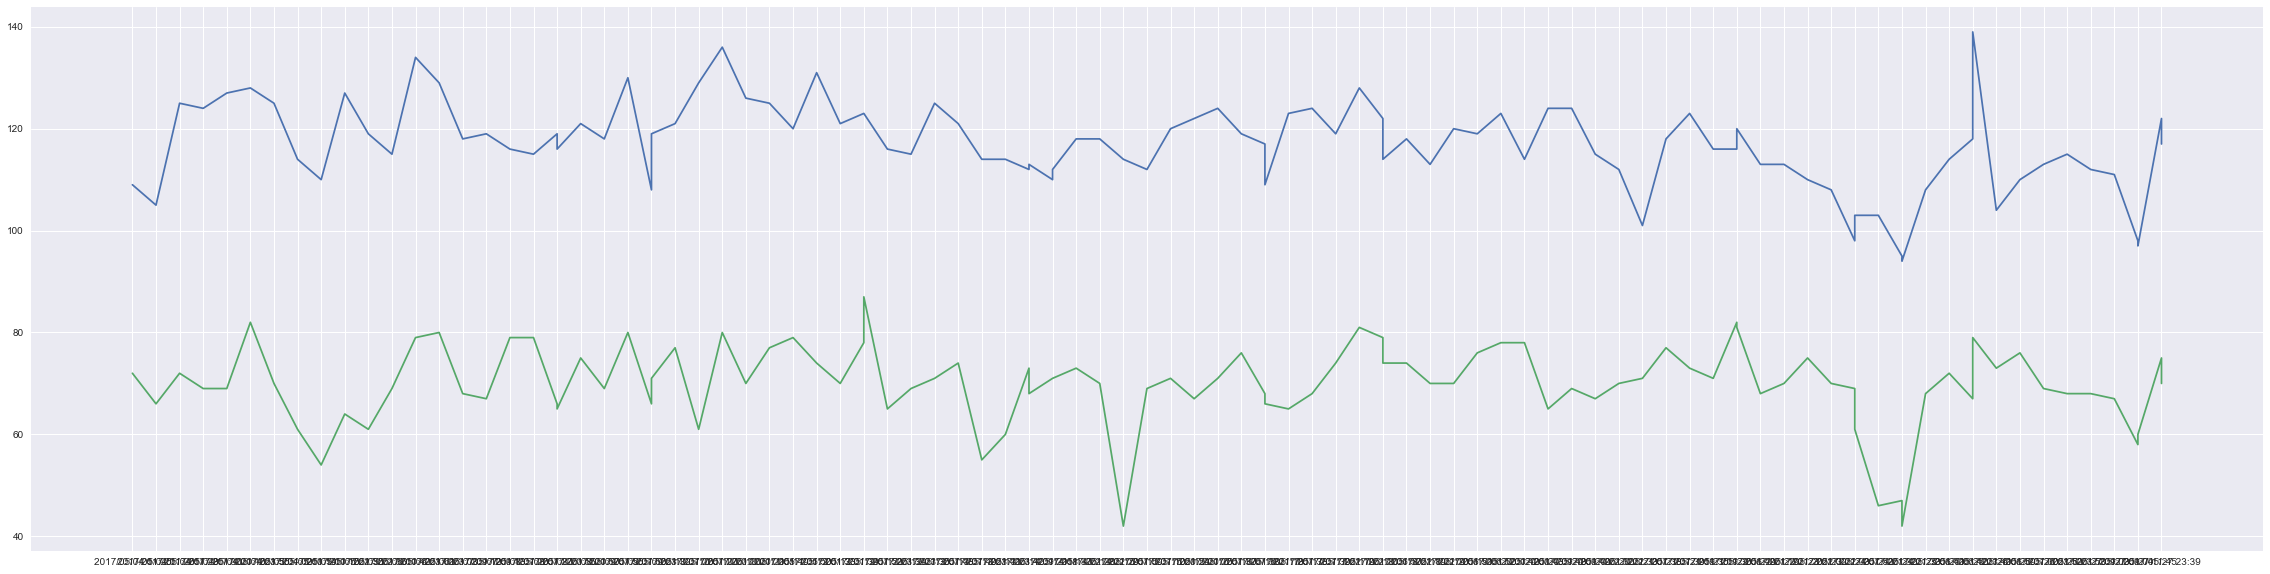

In [23]:
plt.plot(BP['Date'][:100],BP['SYS'][:100])
plt.plot(BP['Date'][:100],BP['DIA'][:100])

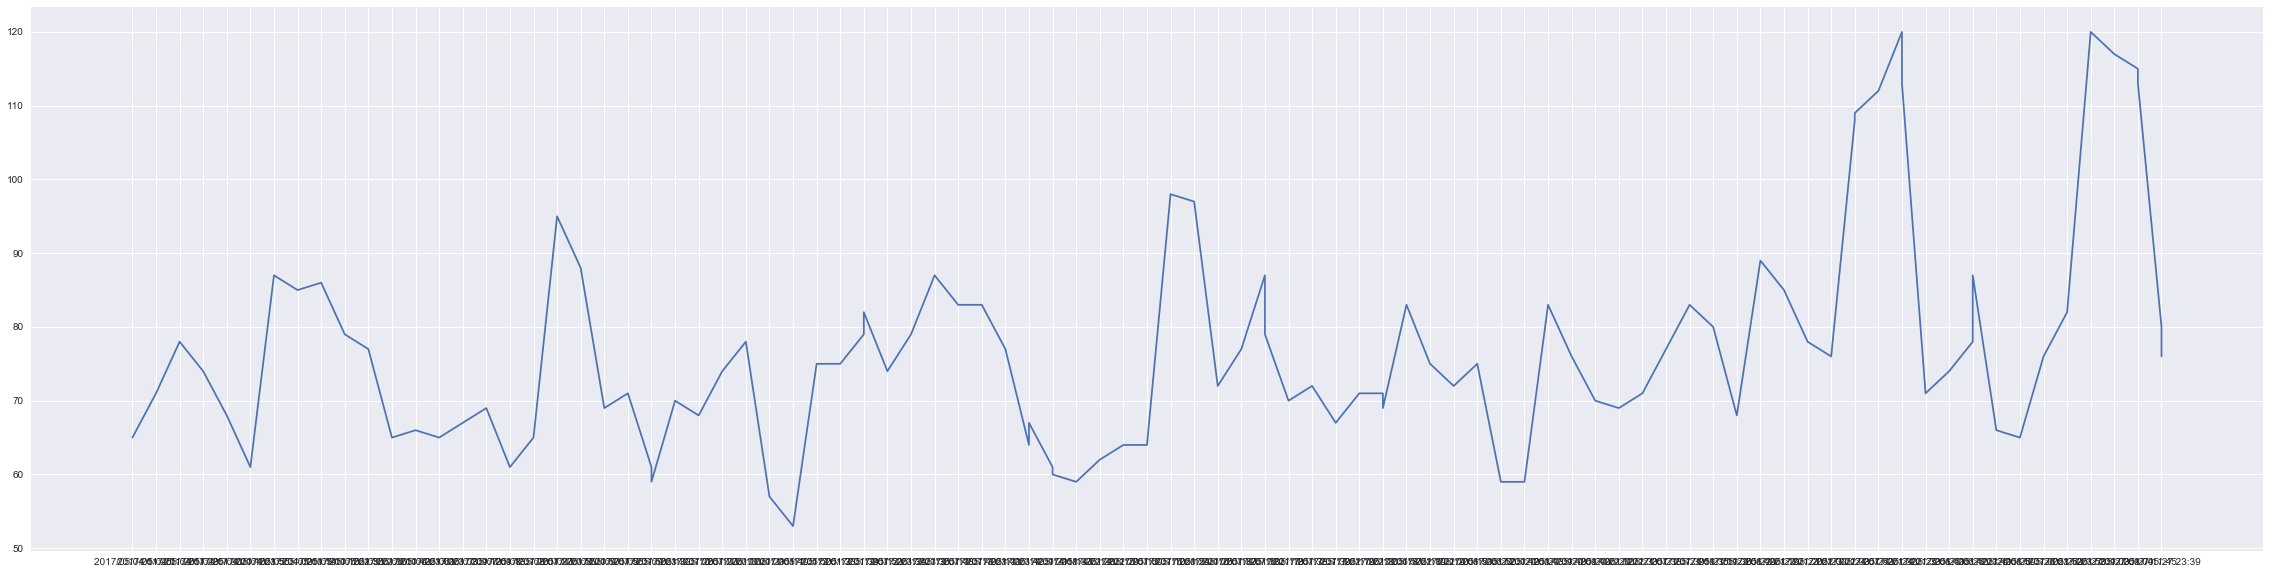

In [24]:
plt.plot(BP['Date'][:100], BP['BPM'][:100])